<a href="https://www.kaggle.com/code/adityashakya2454/shopping-mall-customer-segmentation?scriptVersionId=172350836" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Importing libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read the data

In [2]:
# reading data
data = pd.read_csv('/kaggle/input/shopping-mall-customer-segmentation-data/Shopping Mall Customer Segmentation Data .csv')

In [3]:
# copy the data into a new variable
df = data.copy()

In [4]:
# printing some rows of the data
df.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [5]:
# printing shape of the data
df.shape

(15079, 5)

### Descriptive statistics of data

In [6]:
# print the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     15079 non-null  object
 1   Age             15079 non-null  int64 
 2   Gender          15079 non-null  object
 3   Annual Income   15079 non-null  int64 
 4   Spending Score  15079 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 589.1+ KB


In [7]:
# checking null values
df.isna().sum()

Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64

> **there is no null value in the data**

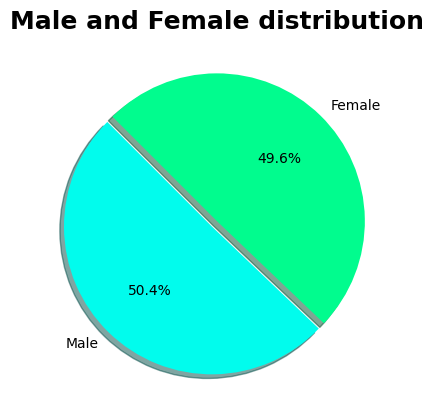

In [8]:
# gender distribution of the customer
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts.values, labels = gender_counts.index, colors = ['#01FCED', '#01FC8E'], explode = [0.05, 0], startangle = 135, shadow = True, autopct= '%1.1f%%')
plt.title('Male and Female distribution', fontsize = 18, fontweight = 'bold')
plt.show()

# Age Groups

In [9]:
# group the ages according to the age groups
bins = [10,20,30,40,50,60,70,80,90,100]
labels  = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df['age-group'] = pd.cut(df['Age'], bins, labels = labels)

In [10]:
df_age_group_counts = df['age-group'].value_counts()

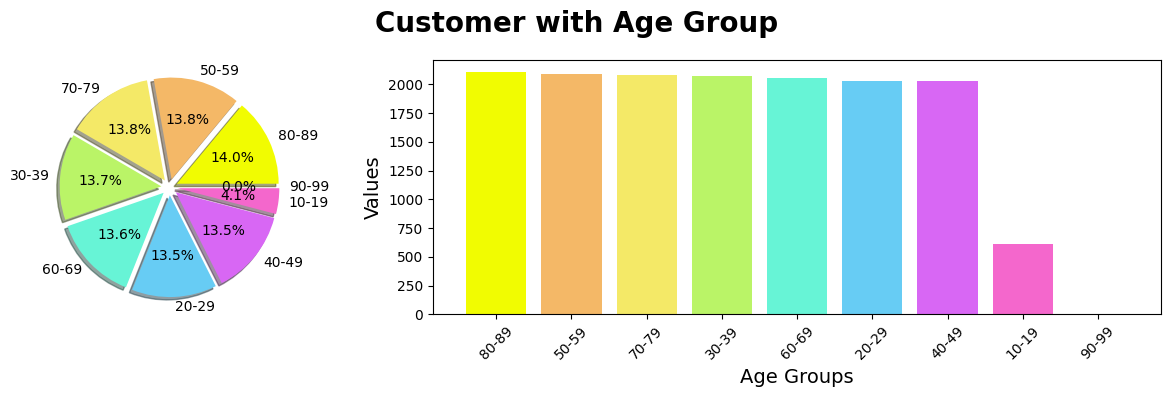

In [11]:

fig, ax = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [2, 5]})

color_ = ['#F1FC01', '#F4B867', '#F4E967', '#BAF467', '#67F4D6', '#67CCF4', '#D867F4', '#F467CC', '#F46792']
ax[0].pie(x=df_age_group_counts.values, labels=df_age_group_counts.index, explode=[0.08]*9, shadow=True, autopct='%1.1f%%', colors=color_)

x_values = range(len(df_age_group_counts))
y_values = df_age_group_counts.values
ax[1].bar(x_values, y_values, color = color_)
ax[1].set_xticks(x_values)
ax[1].set_xticklabels(df_age_group_counts.index, rotation=45)
ax[1].set_xlabel('Age Groups', fontsize = 14)
ax[1].set_ylabel('Values',fontsize = 14)

plt.suptitle('Customer with Age Group', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

# Spending Score

In [12]:
spending_score_bins = [10,20,30,40,50,60,70,80,90,100]
spending_score_labels  = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df['spending-score-group'] = pd.cut(df['Spending Score'], spending_score_bins, labels = spending_score_labels)

In [13]:
df_spending_score_counts = df['spending-score-group'].value_counts()

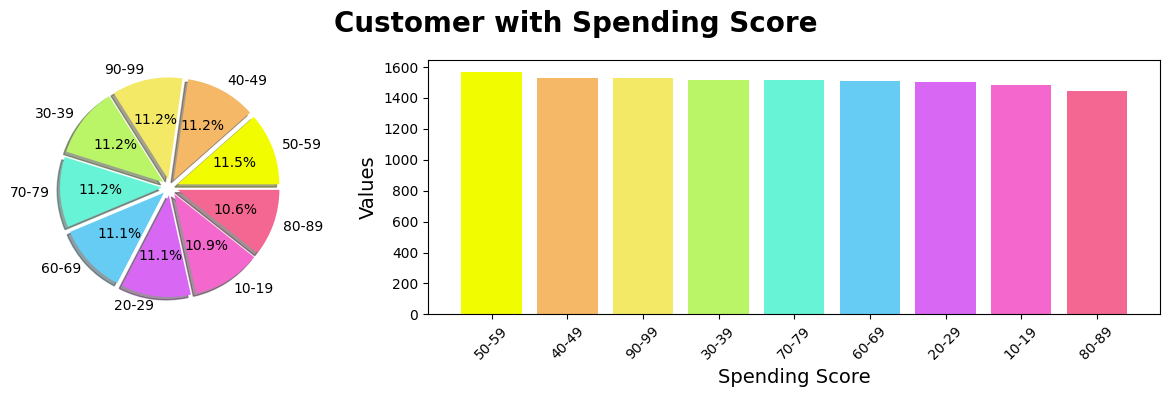

In [14]:

fig, ax = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [2, 5]})

color_ = ['#F1FC01', '#F4B867', '#F4E967', '#BAF467', '#67F4D6', '#67CCF4', '#D867F4', '#F467CC', '#F46792']
ax[0].pie(x=df_spending_score_counts.values, labels=df_spending_score_counts.index, explode=[0.08]*9, shadow=True, autopct='%1.1f%%', colors=color_)


x_values = range(len(df_spending_score_counts))
y_values = df_spending_score_counts.values
ax[1].bar(x_values, y_values, color = color_)
ax[1].set_xticks(x_values)
ax[1].set_xticklabels(df_spending_score_counts.index, rotation=45)
ax[1].set_xlabel('Spending Score', fontsize = 14)
ax[1].set_ylabel('Values',fontsize = 14)

plt.suptitle('Customer with Spending Score', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

In [15]:
df.head()

,Customer ID,Age,Gender,Annual Income,Spending Score,age-group,spending-score-group
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89,20-29,80-89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95,50-59,90-99
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76,60-69,70-79
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57,20-29,50-59
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76,20-29,70-79


# Annual Income

In [16]:
spending_score_bins = [20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000,140000,150000,160000,170000,180000,190000,200000]
spending_score_labels  = ['20000-30000', '30000-40000', '40000-50000', '50000-60000', '60000-70000', 
                          '70000-80000', '80000-90000', '90000-100000', '100000-110000','110000-120000',
                          '120000-130000','130000-140000','140000-150000','150000-160000','160000-170000',
                          '170000-180000','180000-190000','190000-200000'
                         ]
df['annual-income-group'] = pd.cut(df['Annual Income'], spending_score_bins, labels = spending_score_labels)

In [17]:
df_annual_income_counts = df['annual-income-group'].value_counts()

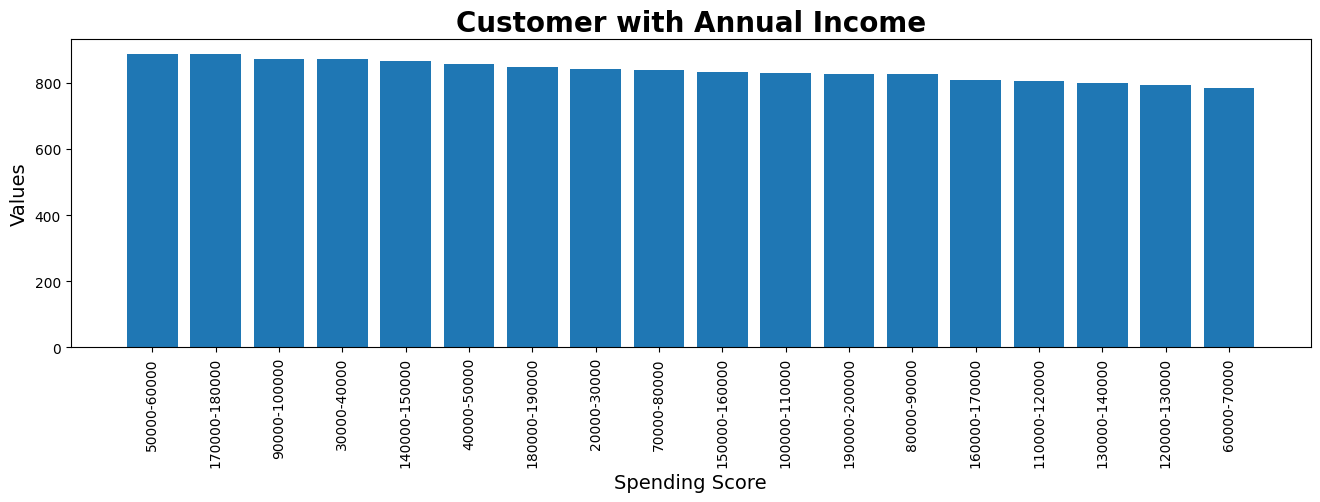

In [18]:
# Customer with Annual Income
plt.figure(figsize = (16,4))
x_values = range(len(df_annual_income_counts))
y_values = df_annual_income_counts.values
plt.bar(x_values, y_values)
plt.xticks(x_values, df_annual_income_counts.index, rotation=90)
# plt.xticklabels(df_annual_income_counts.index, rotation=45)
plt.xlabel('Spending Score', fontsize = 14)
plt.ylabel('Values',fontsize = 14)

plt.title('Customer with Annual Income', fontsize = 20, fontweight = 'bold')
plt.show()

### Average Spending Score by Gender

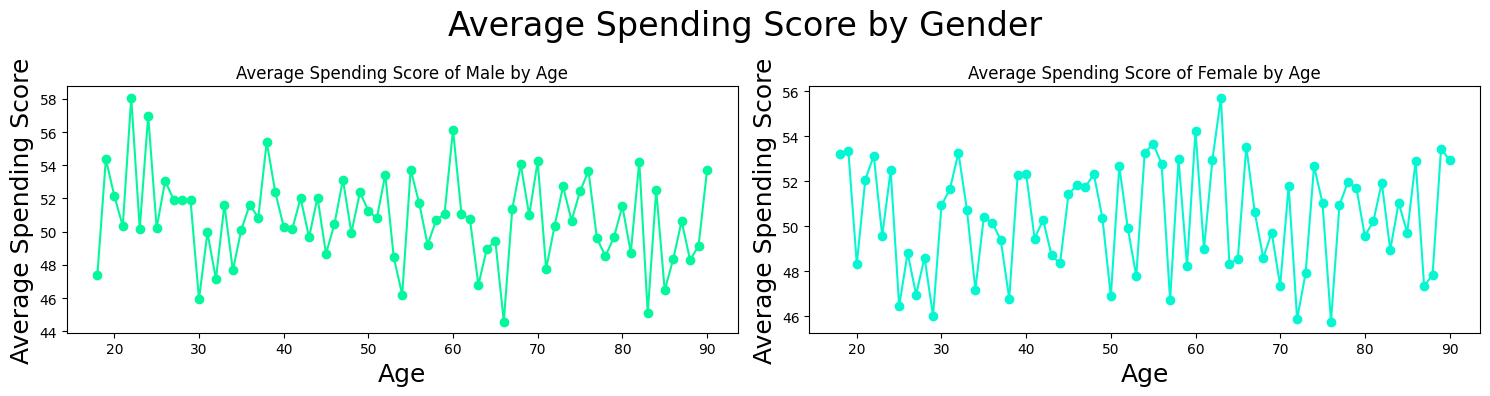

In [19]:
# Average Spending Score of Male by Age
fig, ax = plt.subplots(1,2,figsize = (15,4))
data[data['Gender'] == 'Male'].groupby('Age')['Spending Score'].mean().plot(color = '#05F79B', marker = 'o',ax = ax[0])
ax[0].set_xlabel('Age', fontsize = 18)
ax[0].set_ylabel('Average Spending Score', fontsize = 18)
ax[0].set_title('Average Spending Score of Male by Age')

# Average Spending Score of Female by Age
data[data['Gender'] == 'Female'].groupby('Age')['Spending Score'].mean().plot(color = '#05F7D2', marker = 'o',ax = ax[1])
ax[1].set_xlabel('Age', fontsize = 18)
ax[1].set_ylabel('Average Spending Score', fontsize = 18)
ax[1].set_title('Average Spending Score of Female by Age')

plt.suptitle('Average Spending Score by Gender', fontsize = 24)
plt.tight_layout()
plt.show()

In [20]:
df.head()

,Customer ID,Age,Gender,Annual Income,Spending Score,age-group,spending-score-group,annual-income-group
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89,20-29,80-89,150000-160000
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95,50-59,90-99,180000-190000
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76,60-69,70-79,70000-80000
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57,20-29,50-59,50000-60000
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76,20-29,70-79,150000-160000


### Distribution of Gender across Annual Income Groups

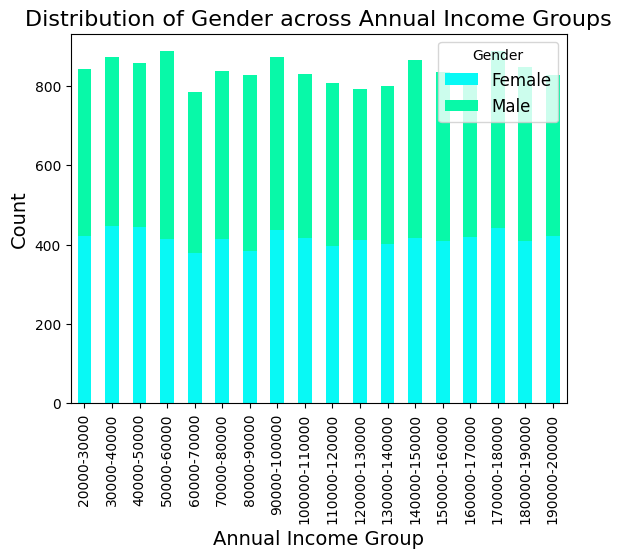

In [21]:
# Group by 'annual-income-group' and 'Gender', then count occurrences of 'Gender'
grouped_data = df.groupby(['annual-income-group', 'Gender'])['Gender'].count()

pivot_data = grouped_data.unstack()

# Plot the bar chart
pivot_data.plot(kind='bar', stacked=True, color=['#08F9F5', '#08F9A8'])

# Add labels and title
plt.xlabel('Annual Income Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Gender across Annual Income Groups', fontsize=16)

# Customize legend
plt.legend(title='Gender', fontsize=12, loc = 'upper right')

# Show plot
plt.show()

### Average Spending Score by Annual Income Group

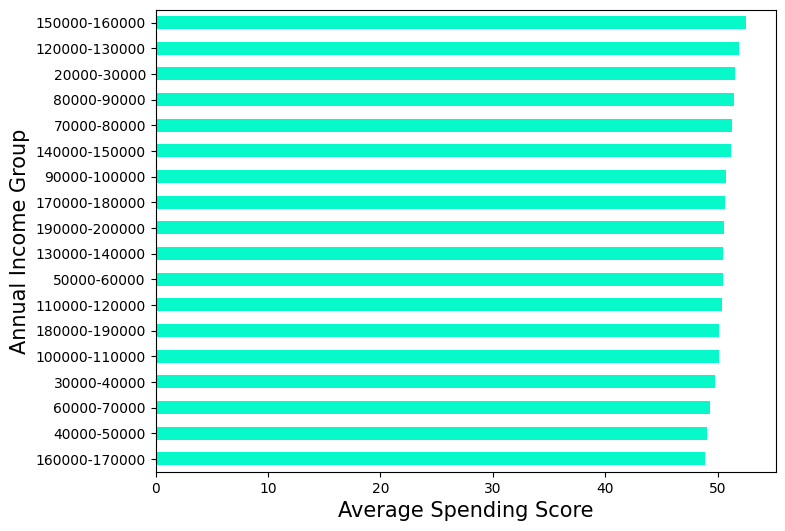

In [22]:
# Average Spending Score by Annual Income Group
plt.figure(figsize = (8,6))
df.groupby('annual-income-group')['Spending Score'].mean().sort_values(ascending = True).plot(kind = 'barh',color = '#08F9C9')
plt.xlabel('Average Spending Score', fontsize = 15)
plt.ylabel('Annual Income Group', fontsize = 15)
plt.show()

In [23]:
df.head()

,Customer ID,Age,Gender,Annual Income,Spending Score,age-group,spending-score-group,annual-income-group
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89,20-29,80-89,150000-160000
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95,50-59,90-99,180000-190000
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76,60-69,70-79,70000-80000
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57,20-29,50-59,50000-60000
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76,20-29,70-79,150000-160000


# Segmentation

In [24]:
# printing data 
data.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [25]:
# removing customer id
data = data.drop('Customer ID', axis = 1)

In [26]:
data.head()

,Age,Gender,Annual Income,Spending Score
0,30,Male,151479,89
1,58,Female,185088,95
2,62,Female,70912,76
3,23,Male,55460,57
4,24,Male,153752,76


In [27]:
# converting Categorical column into numerical
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == "Male" else 0)

In [28]:
data.head()

,Age,Gender,Annual Income,Spending Score
0,30,1,151479,89
1,58,0,185088,95
2,62,0,70912,76
3,23,1,55460,57
4,24,1,153752,76


In [29]:
!pip install kneed

In [30]:
# importing libraries for segmentation
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

In [31]:
data.head()

,Age,Gender,Annual Income,Spending Score
0,30,1,151479,89
1,58,0,185088,95
2,62,0,70912,76
3,23,1,55460,57
4,24,1,153752,76


In [32]:
# standardizing the data
sc = StandardScaler()


In [33]:
X = sc.fit_transform(data)

In [34]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,20):
    KM=KMeans(n_clusters=i,n_init=10)
    KM.fit(X)
    wcss.append(KM.inertia_)

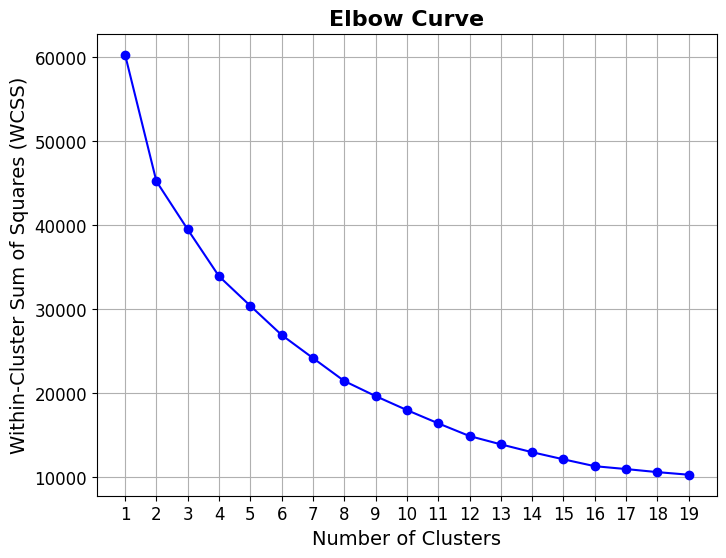

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(range(1,20), wcss, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters", fontsize=14)
plt.ylabel("Within-Cluster Sum of Squares (WCSS)", fontsize=14)
plt.title("Elbow Curve", fontsize=16, fontweight='bold')
plt.grid(True)
plt.xticks(np.arange(1,20), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [36]:
#Finding Best Number of cluster using silhouette score
sil_scores = []

for i in range(2, 20):  # Starting from 2 clusters as silhouette score requires at least 2 clusters
    km = KMeans(n_clusters=i, n_init=10)
    labels = km.fit_predict(X)
    sil_score = silhouette_score(X, labels)
    sil_scores.append(sil_score)


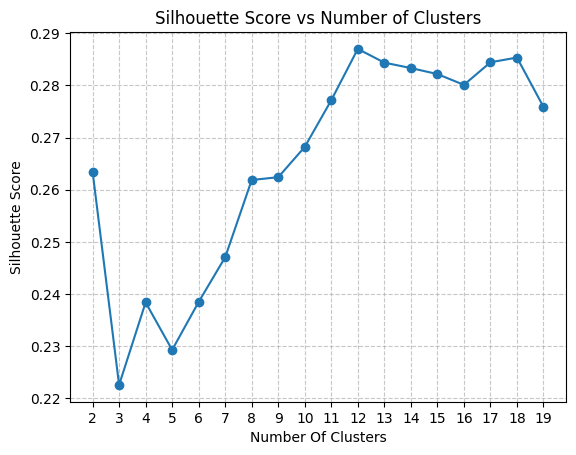

In [37]:
plt.plot(range(2, 20), sil_scores, marker='o', linestyle='-')
plt.xlabel("Number Of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(2, 20))
plt.show()

In [38]:
#Model Building
model=KMeans(n_clusters=6,n_init=10)

In [39]:
data['Label']=model.fit_predict(X)

In [40]:
#Silhoute Score
from sklearn.metrics import silhouette_score
silhouette_score(X,data['Label'])

0.23759860570972471

In [41]:
data.head()

,Age,Gender,Annual Income,Spending Score,Label
0,30,1,151479,89,1
1,58,0,185088,95,4
2,62,0,70912,76,2
3,23,1,55460,57,1
4,24,1,153752,76,1


In [42]:
m=KMeans(n_clusters=6)
#Hyperpera meter tuning




param_grid=[{'init':['k-means++','random']},{'algorithm':['lloyd','elkan']}]


from sklearn.model_selection import GridSearchCV
gsv=GridSearchCV(m,param_grid,cv=10,scoring=silhouette_score)

In [43]:
gsv.fit(X)

GridSearchCV(cv=10, estimator=KMeans(n_clusters=6),
             param_grid=[{'init': ['k-means++', 'random']},
                         {'algorithm': ['lloyd', 'elkan']}],
             scoring=<function silhouette_score at 0x7fb4b39d30a0>)

In [44]:
gsv.best_params_

{'init': 'k-means++'}